# Case Study

## Descrição & Objetivos


Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O
O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

Para cada segmento, eu devo sugerir de duas a três alavancas de resultados

## Variaveis

- cust_id = identificador do cliente
- balance = valor na conta para realizar compras
- balance_frenquecy = mostra a frequencia que o valor na conta é atualizado para fazer compras, esse valor varia de 0 a 1, sendo 1 muito frequente e 0 pouco frequente
- purchase = quantidade de compras feitas
- oneoff_purchase = o valor máximo feito em uma compra
- installments_purchases = valor das compras parceladas
- cash_advance = valor de saque de dinheiro utilizando o cartão de crédito
- purchase_frequency = mostra a frequencia que as compras são feitas, esse valor varia de 0 a 1, sendo 1 muito frequente e 0 pouco frequente
- oneoffpurchasefrequency= Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = não comprado com frequência)
- purchasesinstallmentsfrequency = Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não feito com frequência)
- CASHADVANCEFREQUENCY = Com que frequência o dinheiro adiantado está sendo pago
- CASHADVANCETRX = Número de transações feitas com "Cash in Advanced"
- PURCHASES_TRX = Número de transações de compra feitas
- CREDIT_LIMIT = Limite de cartão de crédito para usuário
- PAGAMENTOS = Valor do pagamento feito pelo usuário
- MINIMUM_PAYMENTS = valor mínimo de pagamentos feitos pelo usuário
- PRCFULLPAYMENT = Porcentagem do pagamento integral pago pelo usuário
- ternure = Posse do serviço de cartão de crédito para o usuário


## Plano de Ação

**Sprint #0**
- Fazer o planejamento da solução **(ok)**
- Fazer o notebook end to end **(ok)**

**Sprint #1**
- Fazer a passo 01 - Data Description **(ok)**
    - Tratar os NAs das colunas: **minimum_payments** e **credit_limits**
- Fazer o passo 02 - Filtragem de Linhas e Colunas
- Fazer o passo 03 - Feature Engeneering
- Fazer o passo 04 - EDA (estudo de espaço)

**Sprint #2**
- Fazer a passo 05 - Data Preparation
- Fazer o passo 06 - Feature Selection
- Fazer o passo 07 - Hyperparameter Fine Tunning
- Fazer o passo 08 - Model Training

**Sprint #3**
- Fazer a passo 09 - Cluster Analysis
- Fazer o passo 10 - Model Production
- Fazer o dashboard

# 0.0 Imports

In [1]:
import inflection

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

from pandas_profiling import ProfileReport

C:\Users\Lucas\resp\marketing_banco\marketing_banco\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Lucas\AppData\Local\Temp\ipykernel_25432\3613674024.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## 0.1 Helper Functions

## 0.2 Loading dataset

In [2]:
df_raw = pd.read_csv('../dados/data.csv')

# 1.0 Descrição dos Dados

In [3]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [4]:
df1.columns = [inflection.underscore(col) for col in df1.columns]

## 1.2 Data Dimensions

In [5]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 8950
Number of Cols: 18


## 1.3 Check DTypes

In [6]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4 Check NAs

In [7]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.5 Fillout NAs

In [8]:
# minimum_payments
df1.loc[df1['minimum_payments'].isna(), 'minimum_payments'] = 0.0

#credit_limit
df1.loc[df1['credit_limit'].isna(), 'credit_limit'] = 0.0

In [9]:
df1.isna().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## 1.6 Change DTypes

## 1.7 Descriptive Statistical

In [10]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

### 1.7.1 Numerical Statistical

In [11]:
# medidas de tendência central - media, mediana e desvio padrão
mean = pd.DataFrame(num_attributes.mean()).T
median = pd.DataFrame(num_attributes.median()).T
std = pd.DataFrame(num_attributes.std()).T

# medidas de dispersão - min, max, range, skew e kurtosis
_min = pd.DataFrame(num_attributes.min()).T
_max = pd.DataFrame(num_attributes.max()).T
_range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# merge dataframe
m = pd.concat([_min, _max, _range, mean, median, std, skew, kurtosis]).T
m.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,min,max,range,mean,median,std,skew,kurtosis
balance,0.0,19043.13856,19043.13856,1564.474828,873.385231,2081.531879,2.393386,7.674751
balance_frequency,0.0,1.00000,1.00000,0.877271,1.000000,0.236904,-2.023266,3.092370
purchases,0.0,49039.57000,49039.57000,1003.204834,361.280000,2136.634782,8.144269,111.388771
oneoff_purchases,0.0,40761.25000,40761.25000,592.437371,38.000000,1659.887917,10.045083,164.187572
installments_purchases,0.0,22500.00000,22500.00000,411.067645,89.000000,904.338115,7.299120,96.575178
cash_advance,0.0,47137.21176,47137.21176,978.871112,0.000000,2097.163877,5.166609,52.899434
purchases_frequency,0.0,1.00000,1.00000,0.490351,0.500000,0.401371,0.060164,-1.638631
oneoff_purchases_frequency,0.0,1.00000,1.00000,0.202458,0.083333,0.298336,1.535613,1.161846
purchases_installments_frequency,0.0,1.00000,1.00000,0.364437,0.166667,0.397448,0.509201,-1.398632
cash_advance_frequency,0.0,1.50000,1.50000,0.135144,0.000000,0.200121,1.828686,3.334734


# 2.0 Filtragem de Linhas e Colunas

In [12]:
df2 = df1.copy()

# 2.0 Feature Engineering

In [13]:
df3 = df2.copy()

In [14]:
# pagamento a vista ou não
df3['one_payment'] = df3['oneoff_purchases'].apply(lambda x: 0 if x == 0 else 1)

# Gasto médio por transação de compra
df3['avg_ticket_purchases'] = df3['purchases'] / df3['purchases_trx']

# Gasto médio por transação de compras totais
df3['avg_ticket_expenses'] = (df3['purchases'] + df3['cash_advance']) / (df3['purchases_trx'] + df3['cash_advance_trx'])

# Soma das despesas / soma dos pagamentos
df3['debt_rate'] = (df3['purchases'] + df3['cash_advance']) / (df3['payments'] + df3['minimum_payments'])

# percentual gasto do limite do cartao
df3['credit_limit_rate'] = df3['purchases'] + df3['cash_advance'] / (6 * df3['credit_limit'])

In [38]:
# substituindo os NAs da feature avg_ticket_purchases
df3.loc[df3['avg_ticket_purchases'].isna(), 'avg_ticket_purchases'] = 0

# substituindo os NAs da feature avg_ticket_expenses
df3.loc[df3['avg_ticket_expenses'].isna(), 'avg_ticket_expenses'] = 0

In [102]:
# substituindo o valor 'inf' pelo valor máximo do avg_ticket_purchases
df3.loc[df3['avg_ticket_purchases'] == np.inf, 'avg_ticket_purchases'] = df3.loc[df3['avg_ticket_purchases'] != np.inf, 'avg_ticket_purchases'].max()

# substituindo o valor 'inf' pelo valor máximo do avg_ticket_expenses
df3.loc[df3['avg_ticket_expenses'] == np.inf, 'avg_ticket_expenses'] = df3.loc[df3['avg_ticket_expenses'] != np.inf, 'avg_ticket_expenses'].max()

# substituindo o valor 'inf' pelo valor máximo do debt_rate
df3.loc[df3['debt_rate'] == np.inf, 'debt_rate'] = df3.loc[df3['debt_rate'] != np.inf, 'debt_rate'].max()

# substituindo o valor 'inf' pelo valor máximo do credit_limit_rate
df3.loc[df3['credit_limit_rate'] == np.inf, 'credit_limit_rate'] = df3.loc[df3['credit_limit_rate'] != np.inf, 'credit_limit_rate'].max()

# 4.0 EDA

In [103]:
df4 = df3.copy()

## 4.1 Univariate Analysis

# 5.0 Data Preparation

In [118]:
df5 = df4.copy()

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
mms = MinMaxScaler()

# transform to variables
df5['balance'] = mms.fit_transform(df5[['balance']])
df5['purchases'] = mms.fit_transform(df5[['purchases']])
df5['oneoff_purchases'] = mms.fit_transform(df5[['oneoff_purchases']])
df5['installments_purchases'] = mms.fit_transform(df5[['installments_purchases']])
df5['cash_advance_trx'] = mms.fit_transform(df5[['cash_advance_trx']])
df5['cash_advance'] = mms.fit_transform(df5[['cash_advance']])
df5['purchases_trx'] = mms.fit_transform(df5[['purchases_trx']])
df5['credit_limit'] = mms.fit_transform(df5[['credit_limit']])
df5['payments'] = mms.fit_transform(df5[['payments']])
df5['minimum_payments'] = mms.fit_transform(df5[['minimum_payments']])
df5['prc_full_payment'] = mms.fit_transform(df5[['prc_full_payment']])
df5['tenure'] = mms.fit_transform(df5[['tenure']])
df5['one_payment'] = mms.fit_transform(df5[['one_payment']])
df5['avg_ticket_purchases'] = mms.fit_transform(df5[['avg_ticket_purchases']])
df5['debt_rate'] = mms.fit_transform(df5[['debt_rate']])
df5['credit_limit_rate'] = mms.fit_transform(df5[['credit_limit_rate']])
df5['avg_ticket_expenses'] = mms.fit_transform(df5[['avg_ticket_expenses']])


In [122]:
df5.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,credit_limit,payments,minimum_payments,prc_full_payment,tenure,one_payment,avg_ticket_purchases,avg_ticket_expenses,debt_rate,credit_limit_rate
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,...,0.033333,0.003979,0.001826,0.000000,1.0,0.0,0.007974,0.004504,0.000305,0.001945
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,...,0.233333,0.080893,0.014035,0.222222,1.0,0.0,0.000000,0.152094,0.001358,0.000003
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,...,0.250000,0.012264,0.008210,0.000000,1.0,1.0,0.010771,0.006084,0.000675,0.015766
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,...,0.250000,0.000000,0.000000,0.000000,1.0,1.0,0.250599,0.080487,1.000000,0.030567
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,...,0.040000,0.013374,0.003204,0.000000,1.0,1.0,0.002675,0.001511,0.000019,0.000326


# 6.0 Feature Selection

In [123]:
df6 = df5.copy()

# 7.0 Hyperparameter Fine Tunning

In [124]:
X = df6.drop(columns=['cust_id'])
X.dropna(inplace=True)

## 7.1 Metodo Elbow

In [125]:
silhouette_score = []

for k in range(2, 10):
    # model definition
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model traning
    km.fit(X)
    
    # model predict
    labels = km.predict(X)
    
    # get variance
    silhouette_score.append(metrics.silhouette_score(X, labels))

Text(0, 0.5, 'K')

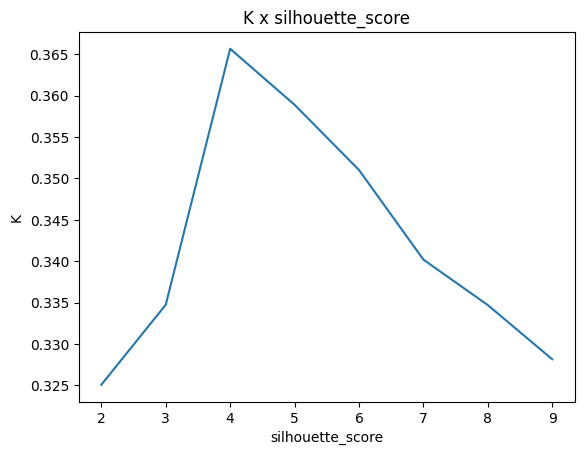

In [126]:
plt.plot(range(2, 10), silhouette_score)
plt.title('K x silhouette_score')
plt.xlabel('silhouette_score')
plt.ylabel('K')

# 8.0 Model Machine Learning

# 9.0 Cluster Analysis